In [1]:
import csv
import os

import numpy as np
import scipy as sp
import scipy.interpolate
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import *
from sklearn.model_selection import train_test_split

In [2]:
NUM_DATA_POINTS = 7000

In [3]:
ACC_PATH = './Accelerometer/'
GRAV_PATH = './Gravity/'
GYRO_PATH = './Gyroscope/'
ROT_PATH = './Rotation/'


In [4]:
file_names = os.listdir(ACC_PATH)
print(len(file_names))

1177


In [5]:
def fileName(file):
    return file.split('_')[0]

In [6]:
def parse(row):
    return list(map(lambda x: float(x), row))

def getData(file_path):
    res = []

    with open(file_path) as csvfile:
        r = csv.reader(csvfile, delimiter=',')

        for row in r:
            res.append(row)

    res = list(map(parse, res[1:]))
    
    for row in res:
        row[-1] = int(row[-1])
 
    return np.array(res)

In [7]:
def interpolate(data, numAfter):
    x = np.array(list(map(lambda x: x[-1], data)))

    new_x = np.linspace(x.min(), x.max(), numAfter)

    res = []
	
    for i in range(len(data[0]) - 1) :
        y = list(map(lambda x: x[i], data))

        new_y = sp.interpolate.interp1d(x, y, kind='cubic')(new_x)
        res.append(new_y)
        # np.append(res, [new_y])

    return np.array(res).transpose(1, 0)


In [8]:
def combineFile(file_name):
	name = fileName(file_name)

	accData = getData(ACC_PATH + file_name)
	gravData = getData(GRAV_PATH+ file_name)
	gyroData = getData(GYRO_PATH + file_name)
	rotData = getData(ROT_PATH + file_name)

	accData = interpolate(accData, NUM_DATA_POINTS)
	gravData = interpolate(gravData, NUM_DATA_POINTS)
	gyroData = interpolate(gyroData, NUM_DATA_POINTS)
	rotData = interpolate(rotData, NUM_DATA_POINTS)

	accumData = []

	for i in range(len(accData)):
		accumData.append(np.concatenate([accData[i], gyroData[i], gravData[i], rotData[i]]))

	return np.array(accumData)
	

In [9]:
combineFile('a_1_0.csv').shape

(7000, 12)

In [10]:
def fetchData(names):
    retDict = {}

    for file_name in names:
        name = fileName(file_name)
        data = combineFile(file_name)
        
        try:
            retDict[name].append(data)
        except:
            retDict[name] = [data]
    
    return retDict
            

In [11]:
def truePositiveRate (preds, trues):
    trueIndeces = []
    for (i, val) in enumerate(trues):
        if (val == 1):
            trueIndeces.append(i)

    TP = 0
    for i in trueIndeces:
        if (preds[i] == 1):
            TP += 1
            
    FN = 0
    for i in trueIndeces:
        if (preds[i] == 0):
            FN += 1

    return TP/(TP+FN)


def falsePositiveRate (preds, trues):           
    falseIndeces = []
    for (i, val) in enumerate(trues):
        if(val == 0):
            falseIndeces.append(i)
            
    TN = 0
    for i in falseIndeces:
        if (preds[i] == 0):
            TN += 1
            
    FP = 0
    for i in falseIndeces:
        if (preds[i] == 1):
            FP += 1

    return FP / (FP+TN)

In [12]:
dict = fetchData(os.listdir(ACC_PATH))

In [13]:
sensors= ["Accelerometer", "Gyroscope", "Gravity Sensor", "Rotation Matrix"]
axis=['X', 'Y', 'Z']

In [14]:
def plotRow(data):
    i=1
    # walk_data_i=dict['a'][i].reshape(12,7300)
    walk_data_i=data[i].transpose(1, 0)
    print(walk_data_i.shape)


    #fig=plt.figure(figsize=(10,10))
    #fig.tight_layout()
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(9, 6))
    fig.tight_layout(h_pad=2)
    x=0
    for i in range(1,5):
        for j in range(1,4):
            ax1 = plt.subplot(4,3,x+1)
            if j ==1:
                ax1.set_ylabel('Amplitude')
            elif j == 2:
                ax1.set_xlabel('X, Y and Z axis data stream for {}'.format(sensors[i-1]))
            sns.lineplot(data=np.transpose(walk_data_i[x]))
            x=x+1
    fig.savefig('alldata.eps', format='eps', dpi=1200, bbox_inches="tight")

In [15]:
pic_order=[1, 5, 9, 2, 6, 10, 3, 7, 11, 4, 8, 12]
def plotRow2(data,i):
    #i=1
    # walk_data_i=dict['a'][i].reshape(12,7300)
    walk_data_i=data[i].transpose(1, 0)
    print(walk_data_i.shape)


    #fig=plt.figure(figsize=(10,10))
    #fig.tight_layout()
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 6))
    fig.tight_layout(h_pad=2)
    x=0
    for i in range(1,5):
        for j in range(1,4):
            #print(pic_order[x])
            ax1 = plt.subplot(3,4,pic_order[x])
            if i ==1:
                ax1.set_ylabel('{}-axis'.format(axis[j-1]))
            if j == 3:
                ax1.set_xlabel(sensors[i-1])
            sns.lineplot(data=np.transpose(walk_data_i[x]))
            x=x+1
    #fig.savefig('filtered.eps', format='eps', dpi=1200, bbox_inches="tight")

In [16]:
i=0

(12, 7000)


/var/folders/zv/2swtbyvx6cn5m4n_0p8hf4780000gn/T/ipykernel_2653/4068037683.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(3,4,pic_order[x])
/var/folders/zv/2swtbyvx6cn5m4n_0p8hf4780000gn/T/ipykernel_2653/4068037683.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(3,4,pic_order[x])
/var/folders/zv/2swtbyvx6cn5m4n_0p8hf4780000gn/T/ipykernel_2653/4068037683.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(3,4,pic_order[x])
/var/folders/zv/2swtbyvx6cn5m4n_0p8hf4780000gn/T/ipykernel_2653/4068037683.py:17: MatplotlibDeprecationWarning: Auto-removal

42


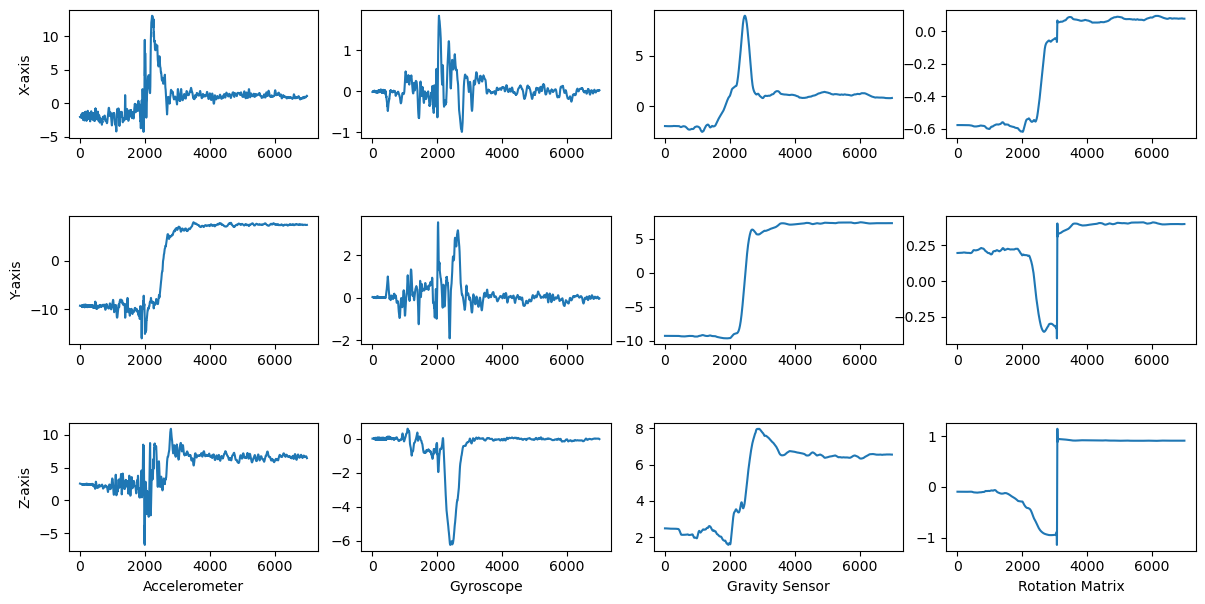

In [17]:
i=42
plotRow2(dict['da'],i)
print(i)

(12, 7000)


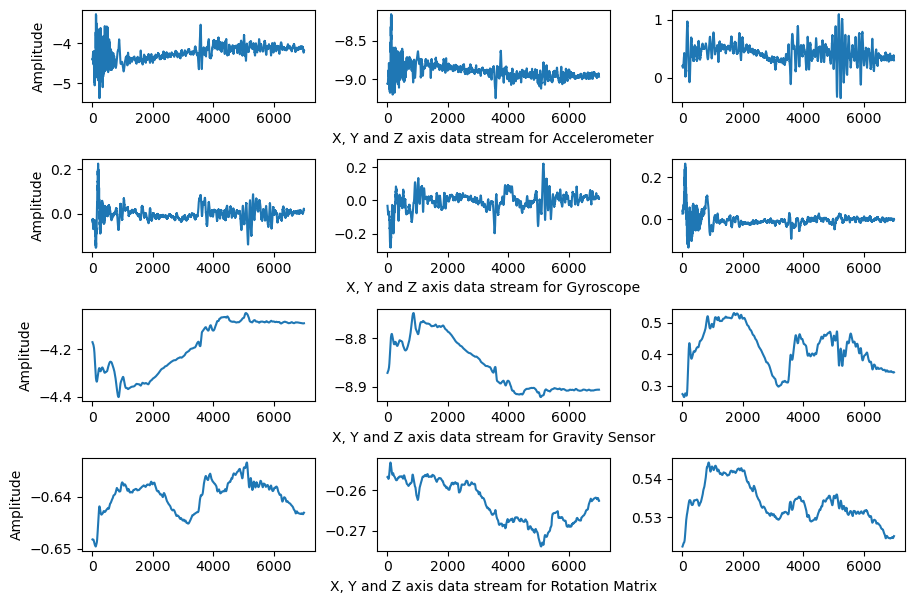

In [18]:
plotRow(dict['dp'])

(12, 7000)


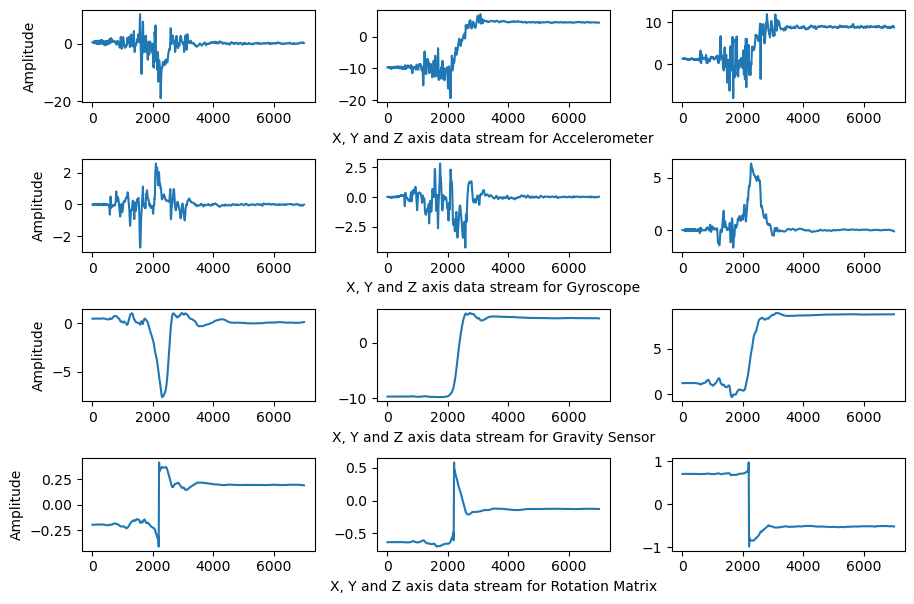

In [19]:
plotRow(dict['dc'])

In [22]:
def setupData(dic, user, attacker):
    user_data = np.array(dic[user])
    attacker_data = np.concatenate(list(map(lambda x: dic[x], attacker)))

    user_labels = [1] * len(user_data)
    attacker_labels = [0] * len(attacker_data)

    all_labels = np.concatenate((user_labels, attacker_labels))
    all_data = np.concatenate([user_data, attacker_data])

    return (all_data, all_labels)

In [18]:
def setupDataAttackers(dic, attacker):
    attacker_data = np.concatenate(list(map(lambda x: dic[x], attacker)))
    attacker_labels = [0] * len(attacker_data)

    return (attacker_data,  attacker_labels)

In [19]:
def setupData_ident(dic, allpeople):
    all_data = np.concatenate(list(map(lambda x: dic[x], allpeople)))
    all_labels=[];
    
    i=0;
    for peeps in dic.keys():
        all_labels = np.concatenate((all_labels, len(dict[peeps])*[i]))
        i=i+1;

    return (all_data, all_labels)

In [20]:
print(dict.keys())

dict_keys(['bb', 'a', 'm', 'ae', 'dc', 'dp1', 'c', 'dm', 'dmm1', 'db', 'dy', 'dpc', 'drm', 'dp', 'da', 'dl', 'dm1c', 'dr1', 'dr', 'm1', 'ddm', 'dd', 'dmc'])


## Data pre-processing

In [21]:
%matplotlib inline
import IPython.core.display         
# setup output image format (Chrome works best)
IPython.core.display.set_matplotlib_formats("svg")
import matplotlib.pyplot as plt
import matplotlib
from numpy import *
import numpy as np

/var/folders/zv/2swtbyvx6cn5m4n_0p8hf4780000gn/T/ipykernel_2738/3950229790.py:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  IPython.core.display.set_matplotlib_formats("svg")


In [17]:
from scipy.fftpack import rfft, irfft, fftfreq, fft, ifft
import copy
from scipy import stats
from scipy import signal
from scipy import io

In [18]:
def lpf2(y):
    Fs = 1000; 
    lp = 50;

    m=7000
    
    
    yf = fft(y);
    #print(yf.shape)
    freq = round((lp/Fs) * (m/5));
    #print(freq)
    yf[:,freq:m - freq] = 0;
    return real(ifft(yf));

In [19]:
def lpbf(y):
    sos = signal.butter(10, 7, 'low', fs=1000, output='sos')
    filtered = signal.sosfilt(sos, y)
    #filtered=filtered[:, 200:6800]
    return filtered

In [20]:
d3 = {k: list(map(lambda a: lpf2(a.transpose(1,0)).transpose(1,0), v)) for k, v in dict.items()}

NameError: name 'real' is not defined

In [ ]:
d2 = {k: list(map(lambda a: lpbf(a.transpose(1,0)).transpose(1,0), v)) for k, v in dict.items()}

(12, 7000)


/var/folders/zv/2swtbyvx6cn5m4n_0p8hf4780000gn/T/ipykernel_2653/4068037683.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(3,4,pic_order[x])
/var/folders/zv/2swtbyvx6cn5m4n_0p8hf4780000gn/T/ipykernel_2653/4068037683.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(3,4,pic_order[x])
/var/folders/zv/2swtbyvx6cn5m4n_0p8hf4780000gn/T/ipykernel_2653/4068037683.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(3,4,pic_order[x])
/var/folders/zv/2swtbyvx6cn5m4n_0p8hf4780000gn/T/ipykernel_2653/4068037683.py:17: MatplotlibDeprecationWarning: Auto-removal

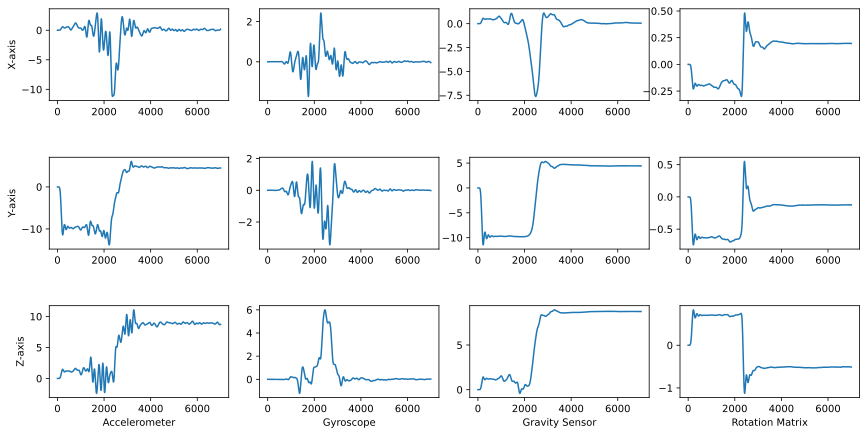

In [30]:
plotRow2(d2['dc'],1)
#plotRow(dict['dc'])

## Setup

In [27]:
dict.keys()

dict_keys(['bb', 'a', 'm', 'ae', 'dc', 'dp1', 'c', 'dm', 'dmm1', 'db', 'dy', 'dpc', 'drm', 'dp', 'da', 'dl', 'dm1c', 'dr1', 'dr', 'm1', 'ddm', 'dd', 'dmc'])

In [27]:
# allData = np.concatenate((dict['a'], dict['bb']), axis=0).transpose(0, 2, 1)
# allData = np.concatenate((dict['a'], dict['bb'], dict['m1'], dict['m'], dict['c']), axis=0)
# allLabels = np.concatenate((alex_label, other_label), axis=0)

target = 'a'
attackers = [x for x in dict.keys() if x != target]

(allData, allLabels) = setupData(dict, target, attackers)

print(allData.shape)
print(allLabels.shape)

(1177, 7000, 12)
(1177,)


## Train test Split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(
	allData,
	allLabels,
    random_state=101,
    test_size = 0.25,
    shuffle=True
)

In [29]:
x_train.shape

(882, 7000, 12)

In [41]:
from sklearn import *
from scipy import stats
from scipy import *
# random.seed(100)
import csv
from scipy import io
import pickle
import keras
import pandas as pd
from keras import models
from keras import layers
from IPython.display import Audio, display
from sklearn.neural_network import MLPClassifier

In [36]:
all_dmfccs = vstack(x_train)
print(all_dmfccs.shape)

(6174000, 12)


/var/folders/zv/2swtbyvx6cn5m4n_0p8hf4780000gn/T/ipykernel_3132/2574393580.py:1: DeprecationWarning: scipy.vstack is deprecated and will be removed in SciPy 2.0.0, use numpy.vstack instead
  all_dmfccs = vstack(x_train)


In [37]:
def bow_transform(model, mfccs):
    numwords = model.cluster_centers_.shape[0]
    bows = zeros((len(mfccs), numwords))
    for i in range(len(mfccs)):
        w = model.predict(mfccs[i])
        bw = bincount(w, minlength=numwords)
        bows[i,:] = bw
    return bows

In [34]:
for K in range(90,120,10):
    km = cluster.KMeans(n_clusters=K, random_state=4487)
    km.fit(all_dmfccs[0::10])  # subsample by 10 to make it faster
    
    train_bow = bow_transform(km, x_train)
    test_bow  = bow_transform(km, x_test)
    
    tf_trans = feature_extraction.text.TfidfTransformer(use_idf=True, norm='l1')
    train_Xtf = tf_trans.fit_transform(train_bow)
    test_Xtf  = tf_trans.transform(test_bow)
    
    lr = linear_model.LogisticRegressionCV(Cs=logspace(-4,4,20), cv=5, class_weight='balanced', solver='liblinear')
    lr.fit(train_Xtf, y_train)
    
    predY = lr.predict(test_Xtf)
    acc = metrics.accuracy_score(y_test, predY)
    print("test accuracy =", acc)

test accuracy = 0.06440677966101695
test accuracy = 0.06440677966101695
test accuracy = 0.06440677966101695


In [35]:
for K in range(90,100,5):
    km = cluster.MiniBatchKMeans(n_clusters=K, random_state=5489, n_init=10, batch_size = 2048)
    km.fit(all_dmfccs[0::10])  # subsample by 10 to make it faster
    
    train_bow = bow_transform(km, x_train)
    test_bow  = bow_transform(km, x_test)
    
    tf_trans = feature_extraction.text.TfidfTransformer(use_idf=True, norm='l2')
    train_Xtf = tf_trans.fit_transform(train_bow)
    test_Xtf  = tf_trans.transform(test_bow)
    
    lr = linear_model.LogisticRegressionCV(Cs=logspace(-4,4,20), cv=5, class_weight='balanced', solver='liblinear')
    lr.fit(train_Xtf, y_train)
    
    predY = lr.predict(test_Xtf)
    acc = metrics.accuracy_score(y_test, predY)
    print("test accuracy =", acc)

test accuracy = 0.9830508474576272
test accuracy = 0.976271186440678


In [36]:
for bw in arange(5,8,1):
    km = cluster.MeanShift(bandwidth=bw, bin_seeding=True)
    km.fit(all_dmfccs[0::10])
    print(size(km.cluster_centers_))
    
    train_bow = bow_transform(km, x_train)
    test_bow  = bow_transform(km, x_test)
    
    tf_trans = feature_extraction.text.TfidfTransformer(use_idf=True, norm='l1')
    train_Xtf = tf_trans.fit_transform(train_bow)
    test_Xtf  = tf_trans.transform(test_bow)
    
    lr = linear_model.LogisticRegressionCV(Cs=logspace(-4,4,20), cv=5, class_weight='balanced', solver='liblinear')
    lr.fit(train_Xtf, y_train)
    
    predY = lr.predict(test_Xtf)
    acc = metrics.accuracy_score(y_test, predY)
    print("test accuracy =", acc)

## Models

In [38]:
target = 'a'
attackers = [x for x in dict.keys() if x != target]

(allData, allLabels) = setupData(dict, target, attackers)

print(allData.shape)
print(allLabels.shape)

(1177, 7000, 12)
(1177,)


In [39]:
#allData=allData[:,:,3:6]

x_train, x_test, y_train, y_test = train_test_split(
	allData,
	allLabels,
    random_state=101,
    test_size = 0.25,
    shuffle=True
)

In [42]:
all_dmfccs = vstack(x_train)
km = cluster.MiniBatchKMeans(n_clusters=90, random_state=5489, n_init=10, batch_size = 2048)
km.fit(all_dmfccs[0::10])  # subsample by 10 to make it faster
km.cluster_centers_
train_bow = bow_transform(km, x_train)
test_bow  = bow_transform(km, x_test)

#feature extraction using BOAW
tf_trans = feature_extraction.text.TfidfTransformer(use_idf=True, norm='l1')
train_Xtf = tf_trans.fit_transform(train_bow)
test_Xtf  = tf_trans.transform(test_bow)

/var/folders/zv/2swtbyvx6cn5m4n_0p8hf4780000gn/T/ipykernel_3132/1057472941.py:1: DeprecationWarning: scipy.vstack is deprecated and will be removed in SciPy 2.0.0, use numpy.vstack instead
  all_dmfccs = vstack(x_train)
/var/folders/zv/2swtbyvx6cn5m4n_0p8hf4780000gn/T/ipykernel_3132/2114992036.py:3: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  bows = zeros((len(mfccs), numwords))
/var/folders/zv/2swtbyvx6cn5m4n_0p8hf4780000gn/T/ipykernel_3132/2114992036.py:6: DeprecationWarning: scipy.bincount is deprecated and will be removed in SciPy 2.0.0, use numpy.bincount instead
  bw = bincount(w, minlength=numwords)
/var/folders/zv/2swtbyvx6cn5m4n_0p8hf4780000gn/T/ipykernel_3132/2114992036.py:6: DeprecationWarning: scipy.bincount is deprecated and will be removed in SciPy 2.0.0, use numpy.bincount instead
  bw = bincount(w, minlength=numwords)
/var/folders/zv/2swtbyvx6cn5m4n_0p8hf4780000gn/T/ipykernel_3132/2114992036.py:6: Deprecati

In [43]:
paramgrid = {'C': logspace(-2,3,20), 
             'gamma': logspace(-4,3,20) }

lr = model_selection.GridSearchCV(svm.SVC(kernel='rbf'), paramgrid, cv=5,
                                    n_jobs=-1, verbose=True)
lr.fit(train_Xtf, y_train)

predY = lr.predict(test_Xtf)
acc = metrics.accuracy_score(y_test, predY)
print("test accuracy =", acc)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


/var/folders/zv/2swtbyvx6cn5m4n_0p8hf4780000gn/T/ipykernel_3132/2115552528.py:1: DeprecationWarning: scipy.logspace is deprecated and will be removed in SciPy 2.0.0, use numpy.logspace instead
  paramgrid = {'C': logspace(-2,3,20),
/var/folders/zv/2swtbyvx6cn5m4n_0p8hf4780000gn/T/ipykernel_3132/2115552528.py:2: DeprecationWarning: scipy.logspace is deprecated and will be removed in SciPy 2.0.0, use numpy.logspace instead
  'gamma': logspace(-4,3,20) }


test accuracy = 0.9661016949152542


In [44]:
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
combine=0;
for target in dict.keys():
    attackers = [x for x in dict.keys() if x != target]
    (allData, allLabels) = setupData(dict, target, attackers)
    allData=allData[:,:,0:12]

    x_train, x_test, y_train, y_test = train_test_split(
        allData,
        allLabels,
        random_state=101,
        test_size = 0.7,
        shuffle=True
    )
    
    #print(x_train.shape)
    
    train_data=array(x_train)

    scaler = StandardScaler()
    num_instances, num_time_steps, num_features = train_data.shape
    train_data = np.reshape(train_data, newshape=(-1, num_features))
    train_data = scaler.fit_transform(train_data)

    x_train = np.reshape(train_data, newshape=(num_instances, num_time_steps, num_features))

    val_data=array(x_test)

    num_instances, num_time_steps, num_features = val_data.shape
    val_data = np.reshape(val_data, newshape=(-1, num_features))
    val_data = scaler.transform(val_data)

    x_test = np.reshape(val_data, newshape=(num_instances, num_time_steps, num_features)) 
    
    all_dmfccs = vstack(x_train)
    km = cluster.MiniBatchKMeans(n_clusters=80, random_state=5489, n_init=10, batch_size = 2048, verbose=0)
    km.fit(all_dmfccs[0::10])  # subsample by 10 to make it faster
    km.cluster_centers_
    train_bow = bow_transform(km, x_train)
    test_bow  = bow_transform(km, x_test)

    #feature extraction using BOAW
    tf_trans = feature_extraction.text.TfidfTransformer(use_idf=True, norm='l1')
    train_Xtf = tf_trans.fit_transform(train_bow)
    test_Xtf  = tf_trans.transform(test_bow)
    
    paramgrid = {'C': logspace(-2,3,20), 
             'gamma': logspace(-4,3,20) }

    lr = model_selection.GridSearchCV(svm.SVC(kernel='rbf'), paramgrid, cv=5,
                                        n_jobs=-1, verbose=0)
    lr.fit(train_Xtf, y_train)

    predY = lr.predict(test_Xtf)
    acc = metrics.accuracy_score(y_test, predY)
    print(target, ": ", acc)
    combine=combine+acc
    
combine/9

In [47]:
# Just trying it for me
target = "a"
attackers = [x for x in dict.keys() if x != target]
(allData, allLabels) = setupData(dict, target, attackers)
allData=allData[:,:,0:12]

x_train, x_test, y_train, y_test = train_test_split(
	allData,
	allLabels,
	random_state=101,
	test_size = 0.7,
	shuffle=True
)

#print(x_train.shape)

train_data=array(x_train)

scaler = StandardScaler()
num_instances, num_time_steps, num_features = train_data.shape
train_data = np.reshape(train_data, newshape=(-1, num_features))
train_data = scaler.fit_transform(train_data)

x_train = np.reshape(train_data, newshape=(num_instances, num_time_steps, num_features))

val_data=array(x_test)

num_instances, num_time_steps, num_features = val_data.shape
val_data = np.reshape(val_data, newshape=(-1, num_features))
val_data = scaler.transform(val_data)

x_test = np.reshape(val_data, newshape=(num_instances, num_time_steps, num_features)) 

all_dmfccs = vstack(x_train)
km = cluster.MiniBatchKMeans(n_clusters=80, random_state=5489, n_init=10, batch_size = 2048, verbose=0)
km.fit(all_dmfccs[0::10])  # subsample by 10 to make it faster
km.cluster_centers_
train_bow = bow_transform(km, x_train)
test_bow  = bow_transform(km, x_test)

#feature extraction using BOAW
tf_trans = feature_extraction.text.TfidfTransformer(use_idf=True, norm='l1')
train_Xtf = tf_trans.fit_transform(train_bow)
test_Xtf  = tf_trans.transform(test_bow)

paramgrid = {'C': logspace(-2,3,20), 
			'gamma': logspace(-4,3,20) }

lr = model_selection.GridSearchCV(svm.SVC(kernel='rbf'), paramgrid, cv=5,
									n_jobs=-1, verbose=0)
lr.fit(train_Xtf, y_train)

predY = lr.predict(test_Xtf)
acc = metrics.accuracy_score(y_test, predY)
print(target, ": ", acc)

/var/folders/zv/2swtbyvx6cn5m4n_0p8hf4780000gn/T/ipykernel_3132/3399344082.py:17: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  train_data=array(x_train)
/var/folders/zv/2swtbyvx6cn5m4n_0p8hf4780000gn/T/ipykernel_3132/3399344082.py:26: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  val_data=array(x_test)
/var/folders/zv/2swtbyvx6cn5m4n_0p8hf4780000gn/T/ipykernel_3132/3399344082.py:34: DeprecationWarning: scipy.vstack is deprecated and will be removed in SciPy 2.0.0, use numpy.vstack instead
  all_dmfccs = vstack(x_train)
/var/folders/zv/2swtbyvx6cn5m4n_0p8hf4780000gn/T/ipykernel_3132/2114992036.py:3: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  bows = zeros((len(mfccs), numwords))
/var/folders/zv/2swtbyvx6cn5m4n_0p8hf4780000gn/T/ipykernel_3132/2114992036.py:6: DeprecationWarning: scipy.bincount is depre

a :  0.9817961165048543


In [48]:
# Saving Model
import pickle

def save(model, name):
	with open(name, 'wb') as f:
		pickle.dump(model, f)

save(lr, 'lr_model.pkl')
save(km, 'km_model.pkl')

In [298]:
combine=0;
for target in dict.keys():
    attackers = [x for x in dict.keys() if x != target]
    (allData, allLabels) = setupData(d2, target, attackers)
    #allData=allData[:,:,-3:6]
    #np.delete(allData, np.s_[6:9], axis=1) 

    x_train, x_test, y_train, y_test = train_test_split(
        allData,
        allLabels,
        random_state=101,
        test_size = 0.9,
        shuffle=True
    )
    
    train_data=array(x_train)

    scaler = StandardScaler()
    num_instances, num_time_steps, num_features = train_data.shape
    train_data = np.reshape(train_data, newshape=(-1, num_features))
    train_data = scaler.fit_transform(train_data)

    x_train = np.reshape(train_data, newshape=(num_instances, num_time_steps, num_features))

    val_data=array(x_test)

    num_instances, num_time_steps, num_features = val_data.shape
    val_data = np.reshape(val_data, newshape=(-1, num_features))
    val_data = scaler.transform(val_data)

    x_test = np.reshape(val_data, newshape=(num_instances, num_time_steps, num_features)) 
    
    all_dmfccs = vstack(x_train)
    km = cluster.MiniBatchKMeans(n_clusters=80, random_state=5489, n_init=10, batch_size = 2048, verbose=0)
    km.fit(all_dmfccs[0::10])  # subsample by 10 to make it faster
    km.cluster_centers_
    train_bow = bow_transform(km, x_train)
    test_bow  = bow_transform(km, x_test)

    #feature extraction using BOAW
    tf_trans = feature_extraction.text.TfidfTransformer(use_idf=True, norm='l1')
    train_Xtf = tf_trans.fit_transform(train_bow)
    test_Xtf  = tf_trans.transform(test_bow)
    
    #print(train_Xtf.shape)
    
    paramgrid = {'C': logspace(-2,3,20), 
             'gamma': logspace(-4,3,20) }

    mlp = MLPClassifier(solver='adam', max_iter=5000, random_state=0, hidden_layer_sizes=[200, 200])
    mlp.fit(train_Xtf, y_train)

    predY = mlp.predict(test_Xtf)
    acc = metrics.accuracy_score(y_test, predY)
    print(target, ": ", acc)
    combine=combine+acc
    
combine/9

a :  0.9314420803782506
bb :  0.9621749408983451
c :  0.9479905437352246
dc :  0.9787234042553191
dd :  0.9456264775413712
dp :  0.8983451536643026
dr :  0.9810874704491725
m1 :  0.9739952718676123
m :  0.9148936170212766


0.9482532177567639

## Identification

In [973]:
allpeople = [x for x in dict.keys()]
(allData, allLabels) = setupData_ident(dict, allpeople)
#allData=concatenate((allData[:,:,0:6],allData[:,:,9:12]), axis=2)
    
x_train, x_test, y_train, y_test = train_test_split(
    allData,
    allLabels,
    random_state=101,
    test_size = 0.4,
    shuffle=True
)


train_data=array(x_train)

scaler = StandardScaler()
num_instances, num_time_steps, num_features = train_data.shape
train_data = np.reshape(train_data, newshape=(-1, num_features))
train_data = scaler.fit_transform(train_data)

x_train = np.reshape(train_data, newshape=(num_instances, num_time_steps, num_features))

val_data=array(x_test)

num_instances, num_time_steps, num_features = val_data.shape
val_data = np.reshape(val_data, newshape=(-1, num_features))
val_data = scaler.transform(val_data)

x_test = np.reshape(val_data, newshape=(num_instances, num_time_steps, num_features)) 

In [974]:
all_dmfccs = vstack(x_train)
km = cluster.MiniBatchKMeans(n_clusters=90, random_state=5489, n_init=10, batch_size = 2048, verbose=0)
km.fit(all_dmfccs)  # subsample by 10 to make it faster
km.cluster_centers_
train_bow = bow_transform(km, x_train)
test_bow  = bow_transform(km, x_test)

tf_trans = feature_extraction.text.TfidfTransformer(use_idf=True, norm='l1')
train_Xtf = tf_trans.fit_transform(train_bow)
test_Xtf  = tf_trans.transform(test_bow)

In [961]:
lr = linear_model.LogisticRegressionCV(Cs=logspace(-4,4,20), cv=5, 
                                        multi_class='ovr', max_iter=5000)
lr.fit(train_Xtf, y_train)
    
predY = lr.predict(test_Xtf)
acc = metrics.accuracy_score(y_test, predY)
print("test accuracy =", acc)

test accuracy = 0.8888888888888888


In [975]:
mlp = MLPClassifier(solver='adam', max_iter=5000, random_state=0, hidden_layer_sizes=[220, 220])
mlp.fit(train_Xtf, y_train)

predY = mlp.predict(test_Xtf)
acc = metrics.accuracy_score(y_test, predY)
print("test accuracy =", acc)

test accuracy = 0.9398148148148148


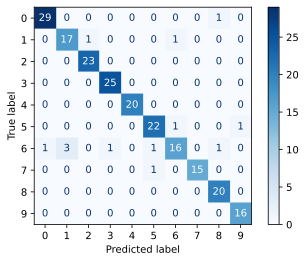

In [985]:
confusion_matrix = metrics.confusion_matrix(y_test, predY)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

#cm_display.figure_.savefig('confuse.eps', format='eps', dpi=1200, bbox_inches="tight")

cm=cm_display.plot(cmap=plt.cm.Blues)
cm.figure_.savefig('confuse.eps', format='eps', dpi=500, bbox_inches="tight")
plt.show()

In [958]:
paramgrid = {'estimator__C': logspace(-4,4,30), 
             'estimator__gamma': logspace(-4,4,30) }

msvm=multiclass.OneVsRestClassifier(svm.SVC(kernel='rbf'))

lr = model_selection.GridSearchCV(msvm, paramgrid, cv=5,
                                        n_jobs=-1, verbose=0)
lr.fit(train_Xtf, y_train)

predY = lr.predict(test_Xtf)
acc = metrics.accuracy_score(y_test, predY)
print("test accuracy =", acc)

test accuracy = 0.9259259259259259


In [945]:
paramsampler = {'max_features': stats.uniform(0,1.0),
                 'max_depth':         stats.randint(1,5),
                 'min_samples_split': stats.uniform(0,0.5), 
                 'min_samples_leaf':  stats.uniform(0,0.5),
               }

# setup the cross-validation object
lr = model_selection.RandomizedSearchCV(
                            ensemble.RandomForestClassifier(n_estimators=100, random_state=4487, n_jobs=-1),
                            param_distributions=paramsampler, 
                            random_state=4487, n_iter=100, cv=5, 
                            verbose=1, n_jobs=-1)

lr.fit(train_Xtf, y_train)

predY = lr.predict(test_Xtf)
acc = metrics.accuracy_score(y_test, predY)
print("test accuracy =", acc)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   12.3s


test accuracy = 0.7824074074074074


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   14.6s finished


## One-Class 

In [996]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor

In [997]:
allData.shape

(539, 7000, 12)

In [1068]:
combine=0;
cTAR=0;
cFAR=0;

for target in dict.keys():
    attackers = [x for x in d2.keys() if x != target]
    (allData, allLabels) = setupData(d2, target, attackers)
    allData1=allData[:,:,3:6]
    #allData=concatenate((allData[:,:,0:6],allData[:,:,9:12]), axis=2)
    #allData=allData[:,:,-3:6]
    #np.delete(allData, np.s_[6:9], axis=1) 


    x_train, x_test, y_train, y_test = train_test_split(
        allData,
        allLabels,
        random_state=1,
        test_size = 0.7,
        shuffle=True
    )

    train_data=array(x_train)

    scaler = StandardScaler()
    num_instances, num_time_steps, num_features = train_data.shape
    train_data = np.reshape(train_data, newshape=(-1, num_features))
    train_data = scaler.fit_transform(train_data)

    x_train = np.reshape(train_data, newshape=(num_instances, num_time_steps, num_features))

    val_data=array(x_test)

    num_instances, num_time_steps, num_features = val_data.shape
    val_data = np.reshape(val_data, newshape=(-1, num_features))
    val_data = scaler.transform(val_data)

    x_test = np.reshape(val_data, newshape=(num_instances, num_time_steps, num_features)) 

    all_dmfccs = vstack(x_train)
    km = cluster.MiniBatchKMeans(n_clusters=15, random_state=5489, n_init=10, batch_size = 2048, verbose=0)
    km.fit(all_dmfccs)  # subsample by 10 to make it faster
    km.cluster_centers_
    train_bow = bow_transform(km, x_train)
    test_bow  = bow_transform(km, x_test)

        #feature extraction using BOAW
    tf_trans = feature_extraction.text.TfidfTransformer(use_idf=True, norm='l1')
    train_Xtf = tf_trans.fit_transform(train_bow)
    test_Xtf  = tf_trans.transform(test_bow)

    #model = OneClassSVM(kernel='rbf', gamma='scale', nu=0.1)
    model = IsolationForest(n_estimators=100, contamination=0.15, random_state=1)
    #model = EllipticEnvelope(contamination=0.5)
    #model = LocalOutlierFactor(contamination=0.5)
    # fit on majority class
    train_Xtf = train_Xtf[y_train==1]
    model.fit(train_Xtf.toarray())

    predY = model.predict(test_Xtf.toarray())
    acc = metrics.accuracy_score(y_test,(predY+1)/2)
    print("test accuracy =", acc)
    print(truePositiveRate((predY+1)/2, y_test))
    print(falsePositiveRate((predY+1)/2, y_test))
    combine=combine+acc
    cTAR=cTAR+truePositiveRate((predY+1)/2, y_test)
    cFAR=cFAR+falsePositiveRate((predY+1)/2, y_test)
    
print("combined acc:", combine/10)
print("combined TAR:", cTAR/10)
print("combined FAR:", cFAR/10)

test accuracy = 0.8888888888888888
0.5882352941176471
0.06422018348623854
test accuracy = 0.8994708994708994
0.8421052631578947
0.09411764705882353
test accuracy = 0.7883597883597884
0.8333333333333334
0.21637426900584794
test accuracy = 0.791005291005291
0.9166666666666666
0.2222222222222222
test accuracy = 0.9656084656084656
0.9487179487179487
0.032448377581120944
test accuracy = 0.828042328042328
0.8611111111111112
0.17543859649122806
test accuracy = 0.544973544973545
0.8604651162790697
0.4955223880597015
test accuracy = 0.9708994708994709
0.7222222222222222
0.0029239766081871343
test accuracy = 0.8968253968253969
0.7777777777777778
0.09064327485380116
test accuracy = 0.5767195767195767
0.8947368421052632
0.4588235294117647
combined acc: 0.8150793650793652
combined TAR: 0.8245371575488936
combined FAR: 0.18527344647789357
